# <b/> <center><font color='green'>Financial AI Agent using LangGraph</font></center>

#### <b/>Project Overview:
<b>Objective:</b> The project aims to build an intelligent finance assistant capable of answering complex queries about financial metrics. This assistant utilizes advanced AI techniques and integrates various tools to provide accurate financial information based on user queries.

#### <b/>Components and Technologies Used
1. <b/>Language Model Integration:

* Model: Llama 3.1 (or a similar large language model).
* Library: langchain_groq to interface with the language model.
* Purpose: The model processes natural language queries and generates appropriate responses. It can also interact with tools to fetch and compute required data.

2. <b/>Tool Integration:

* <b>Tools:</b> A set of tools provided by the langchain_core library, which includes:
  * company_address: Fetches the address of a company based on its stock ticker.
  * fulltime_employees: Retrieves the number of full-time employees for a given company.
  * last_close_price: Provides the last closing price of a company's stock.
  * EBITDA: Returns the EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization) for a company.
  * total_debt: Retrieves the total debt of a company.
  * total_revenue: Provides the total revenue of a company.
  * debt_to_equity_ratio: Calculates the debt-to-equity ratio of a company.

3. <b/>State Management and Execution:

* State Graph: Uses StateGraph from langgraph to manage the flow of execution between the language model and tools.
* Graph Logic:
  * Nodes: Define actions like calling the model (llama3) or executing tools (action).
  * Conditional Edges: Determine whether to continue interacting with the model or executing actions based on the presence of tool calls.
  * Graph Execution: Uses methods to run the state graph, invoking tools and processing results.

4. <b/>Custom Agent:

  * Agent Class: ReActAgent integrates the language model and tools, facilitating interactions through the state graph.
  * Functionality:
     * Handles queries from users.
     * Determines if and which tools to call based on the query.
     * Manages tool executions and combines results with model responses.

5. <b/>User Interaction:
  * Interface: Users interact with the system by sending queries like “Compare total revenue of Amazon and Google.”
  * Response Handling: The system fetches relevant data using the integrated tools and provides comprehensive responses.

6. <b/>Visualization:
  * Graph Visualization: Uses libraries like graphviz to visualize the state graph for understanding the flow and interactions.
 
#### <b/>Key Technologies:
* Python: The primary programming language used.
* langchain_groq: For integrating and managing the language model.
* langchain_core: For tool definitions and message handling.
* langgraph: For defining and managing the state graph.
* yfinance: To fetch financial data.
* graphviz: For visualizing the state graph.

#### <b/> Table of Contents:
##### 1. Loading LLM(Groq Llama 3.1 70B)
##### 2. Defining Tools
##### 3. Binding Tools with LLM Model
##### 4. Defining ReAct | Tool Calling Agent
##### 5. Query the Agent

In [2]:
from dotenv import find_dotenv, load_dotenv
import os

load_dotenv(find_dotenv())

groq_api_key = os.environ["GROQ_API_KEY"]

## <b/> 1. Loading LLM Model

 * <b/> Installing LangChain Groq Module 

In [3]:
from langchain_groq import ChatGroq

llama3 = ChatGroq(api_key = groq_api_key, model = "llama-3.1-70b-versatile")

llama3

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x119ec7dd0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x119a79350>, model_name='llama-3.1-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [4]:
llama3.invoke("Hello, how are you Llama 3.1?")

AIMessage(content="Hello! I'm doing well, thank you for asking. I'm a large language model, so I don't have emotions or feelings like humans do, but I'm functioning properly and ready to help with any questions or tasks you may have. It's nice to chat with you! How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 47, 'total_tokens': 112, 'completion_time': 0.26, 'prompt_time': 0.011457342, 'queue_time': 0.004980424999999998, 'total_time': 0.271457342}, 'model_name': 'llama-3.1-70b-versatile', 'system_fingerprint': 'fp_b3ae7e594e', 'finish_reason': 'stop', 'logprobs': None}, id='run-4641f618-298e-4620-9b29-d761140de24d-0', usage_metadata={'input_tokens': 47, 'output_tokens': 65, 'total_tokens': 112})

## <b/> 2. Defining Tools

In [5]:
from langchain_core.tools import tool, StructuredTool
import yfinance as yf

@tool
def company_address(ticker: str) -> str:
    """
    Returns company address for input ticker.
    e.g. company_address: AAPL
    Returns company address for ticker AAPL which is stock ticker for Apple Inc.
    """
    ticker_obj = yf.Ticker(ticker)
    info = ticker_obj.get_info()

    return " ".join([info[key] for key in ['address1','city','state','zip','country']])

@tool
def fulltime_employees(ticker: str) -> int:
    """
    Returns fulltime employees count for input ticker.
    e.g. company_address: MSFT
    Returns fulltime employees count for ticker MSFT which is stock ticker for Microsoft.
    """
    ticker_obj = yf.Ticker(ticker)
    info = ticker_obj.get_info()

    return info['fullTimeEmployees']

@tool
def last_close_price(ticker: str) -> float:
    """
    Returns last close price for input ticker.
    e.g. company_address: MSFT
    Returns last close price for ticker MSFT which is stock ticker for Microsoft.
    """
    ticker_obj = yf.Ticker(ticker)
    info = ticker_obj.get_info()

    return info['previousClose']

@tool
def EBITDA(ticker: str) -> float:
    """
    Returns EBITDA for input ticker.
    e.g. company_address: AAPL
    Returns EBITDA for ticker AAPL which is stock ticker for Apple Inc.
    """
    ticker_obj = yf.Ticker(ticker)
    info = ticker_obj.get_info()

    return info['ebitda']

@tool
def total_debt(ticker: str) -> float:
    """
    Returns total debt for input ticker.
    e.g. company_address: AAPL
    Returns total debt for ticker AAPL which is stock ticker for Apple Inc.
    """
    ticker_obj = yf.Ticker(ticker)
    info = ticker_obj.get_info()

    return info['totalDebt']

@tool
def total_revenue(ticker: str) -> float:
    """
    Returns total revenue for input ticker.
    e.g. company_address: MSFT
    Returns total revenue for ticker MSFT which is stock ticker for Microsoft.
    """
    ticker_obj = yf.Ticker(ticker)
    info = ticker_obj.get_info()

    return info['totalRevenue']

@tool
def debt_to_equity_ratio(ticker: str) -> float:
    """
    Returns debt to equity ratio for input ticker.
    e.g. company_address: AAPL
    Returns debt to equity ratio for ticker AAPL which is stock ticker for Apple Inc.
    """
    ticker_obj = yf.Ticker(ticker)
    info = ticker_obj.get_info()

    return info['debtToEquity']

tools = [
    company_address,
    fulltime_employees,
    last_close_price,
    EBITDA,
    total_debt,
    total_revenue,
    debt_to_equity_ratio
]

## <b/> 3. Binding Tools with LLMs

In [6]:
llama3_with_tools = llama3.bind_tools(tools, tool_choice='auto')

In [7]:
ai_msg = llama3_with_tools.invoke('Whatzzz up??')

print(ai_msg.content)
print(ai_msg.tool_calls)

I'm here to help with your finance-related queries. What would you like to know?
[]


In [8]:
ai_msg = llama3_with_tools.invoke("What's the EBITDA of Microsoft?")

print(ai_msg.content)
print(ai_msg.tool_calls)


[{'name': 'EBITDA', 'args': {'ticker': 'MSFT'}, 'id': 'call_xvbb', 'type': 'tool_call'}]


In [9]:
EBITDA.invoke(ai_msg.tool_calls[0]['args'])

129433001984

## <b/> 4. Defining ReAct / Tool Calling Agent

<img src = 'https://raw.githubusercontent.com/sunny2309/langchain_tutorials/main/LangGraph_ReAct_Agent.png' height=600 width=800>

In [10]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Annotated
import operator
from langchain_core.messages import HumanMessage, AnyMessage, SystemMessage, ToolMessage

class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]

class ReActAgent:
    def __init__(self, model, tools, system=""):
        self.system = system
        self.tools = {t.name: t for t in tools}
        self.model = model.bind_tools(tools, tool_choice="auto")

        graph = StateGraph(AgentState)
        graph.add_node("llama3", self.call_llm)
        graph.add_node("action", self.take_action)
        graph.add_conditional_edges(
            "llama3",
            self.exists_action,
            {True: "action", False: END}
        )
        graph.add_edge("action", "llama3")
        graph.set_entry_point("llama3")
        self.graph = graph.compile()

    def exists_action(self, state: AgentState):
        result = state['messages'][-1]
        return len(result.tool_calls) > 0

    def call_llm(self, state: AgentState):
        messages = state['messages']
        if self.system:
            messages = [SystemMessage(content=self.system)] + messages
        message = self.model.invoke(messages)
        return {'messages': [message]}

    def take_action(self, state: AgentState):
        tool_calls = state['messages'][-1].tool_calls
        results = []
        for t in tool_calls:
            print(f"Calling Tool : {t}")
            if not t['name'] in self.tools:
                print(f"\n Tool : {t} does not exist.")
                result = "Incorrect Tool Name, Please retry and select tool from available tools."
            else:
                result = self.tools[t['name']].invoke(t['args'])
            results.append(ToolMessage(tool_call_id = t['id'], name = t['name'], content = str(result)))
        print("Tool execution is completed. Back to the model!")
        return {'messages' : results}

In [11]:
prompt = """
You are a smart AI finance assistant. Use the list of available tools to answer questions if needed.
You are allowed to make multiple calls (either together or in sequence).
If you need to look up some information before asking a follow up question, you are allowed to do that!
"""

agent = ReActAgent(llama3, tools, system=prompt)

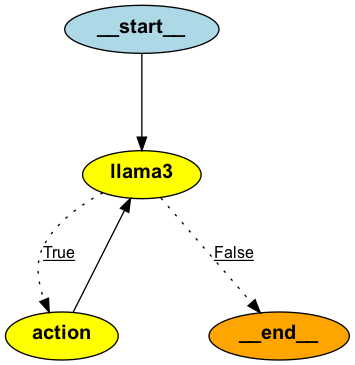

In [13]:
# Visualizing the graph
from IPython.display import Image

Image(agent.graph.get_graph().draw_png())

## <b/> 5. Using the Agent

In [14]:
messages = [HumanMessage(content="What's up Llama 3.1?")]

result = agent.graph.invoke({'messages': messages})

result['messages'][-1].content

"I'm here and ready to assist. What can I help you with today?"

In [15]:
messages = [HumanMessage(content="What is the EBITDA of Nvidia?")]

result = agent.graph.invoke({'messages': messages})

Calling Tool : {'name': 'EBITDA', 'args': {'ticker': 'NVDA'}, 'id': 'call_xdmg', 'type': 'tool_call'}
Tool execution is completed. Back to the model!


In [16]:
result

{'messages': [HumanMessage(content='What is the EBITDA of Nvidia?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xdmg', 'function': {'arguments': '{"ticker": "NVDA"}', 'name': 'EBITDA'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 957, 'total_tokens': 974, 'completion_time': 0.068, 'prompt_time': 0.236422996, 'queue_time': 0.005599932000000002, 'total_time': 0.304422996}, 'model_name': 'llama-3.1-70b-versatile', 'system_fingerprint': 'fp_9260b4bb2e', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-44f1ccdd-c547-44fd-a133-43564f6ea791-0', tool_calls=[{'name': 'EBITDA', 'args': {'ticker': 'NVDA'}, 'id': 'call_xdmg', 'type': 'tool_call'}], usage_metadata={'input_tokens': 957, 'output_tokens': 17, 'total_tokens': 974}),
  ToolMessage(content='61184000000', name='EBITDA', tool_call_id='call_xdmg'),
  AIMessage(content='The EBITDA of Nvidia is 61,184,000,00

In [17]:
result['messages'][-1].content

'The EBITDA of Nvidia is 61,184,000,000.'

In [18]:
messages = [HumanMessage(content="What is the EBITDA and debt-to-equity ratio of Meta?")]

result = agent.graph.invoke({'messages': messages})

Calling Tool : {'name': 'EBITDA', 'args': {'ticker': 'META'}, 'id': 'call_wzzy', 'type': 'tool_call'}
Calling Tool : {'name': 'debt_to_equity_ratio', 'args': {'ticker': 'META'}, 'id': 'call_27wj', 'type': 'tool_call'}
Tool execution is completed. Back to the model!


In [19]:
result['messages'][-1].content

'The EBITDA of Meta is $74,774,003,712. The debt-to-equity ratio of Meta is 24.235.'

In [24]:
messages = [HumanMessage(content="Compare total revenue of Amazon and Google.")]

result = agent.graph.invoke({'messages': messages})

Calling Tool : {'name': 'total_revenue', 'args': {'ticker': 'AMZN'}, 'id': 'call_7874', 'type': 'tool_call'}
Calling Tool : {'name': 'total_revenue', 'args': {'ticker': 'GOOGL'}, 'id': 'call_xme3', 'type': 'tool_call'}
Tool execution is completed. Back to the model!


In [25]:
result['messages'][-1].content

"Amazon's total revenue is $604.33 billion, while Google's total revenue is $328.28 billion. Amazon's total revenue is higher than Google's."

------

### This project combines modern AI techniques, financial data tools, and state management to create an intelligent and interactive finance assistant. If you need more details or have specific questions about any part of the project, feel free to ask!